In [ ]:

from neuron import h
import os
current_directory = os.getcwd()
print(current_directory)
path = os.path.join(current_directory, "mechanisms", "nrnmech.dll")
print(path)
h.nrn_load_dll(path)
from neuron.units import mV,V,m,um,ms
import matplotlib.pyplot as plt
import numpy as np
h.load_file("stdrun.hoc")

1.0

In [ ]:
from HH_minimal_cells import Fast_Spiking,Intrinsic_Bursting
cell=Intrinsic_Bursting(0,0,0,0,0,1)
h.topology()
cell.soma.psection()


|-|       Intrinsically Bursting[0].soma(0-1)



{'point_processes': {'ExpSyn': {ExpSyn[0]}},
 'density_mechs': {'pas': {'g': [1e-05], 'e': [-85.0], 'i': [0.0]},
  'extracellular': {'xraxial': [[1000000000.0, 1000000000.0]],
   'xg': [[1000000000.0, 1000000000.0]],
   'xc': [[0.0, 0.0]],
   'e': [0.0],
   'i_membrane': [0.0],
   'vext': [[0.0, 0.0]]},
  'cad': {'depth': [1.0],
   'taur': [5.0],
   'cainf': [0.00024],
   'kt': [0.0],
   'kd': [0.0]},
  'hh2': {'gnabar': [0.05],
   'gkbar': [0.005],
   'vtraub': [-55.0],
   'm_inf': [0.0],
   'h_inf': [0.0],
   'n_inf': [0.0],
   'tau_m': [0.0],
   'tau_h': [0.0],
   'tau_n': [0.0],
   'm_exp': [0.0],
   'h_exp': [0.0],
   'n_exp': [0.0],
   'm': [0.0],
   'h': [0.0],
   'n': [0.0]},
  'ical': {'gcabar': [0.00017],
   'carev': [0.0],
   'alpha_m': [0.0],
   'beta_m': [0.0],
   'alpha_h': [0.0],
   'beta_h': [0.0],
   'm': [0.0],
   'h': [0.0]},
  'im': {'gkbar': [3e-05], 'm_inf': [0.0], 'tau_m': [0.0], 'm': [0.0]}},
 'ions': {'na': {'ena': [50.0],
   'nai': [10.0],
   'nao': [140.0],
 

In [ ]:
# Insert electrode
from electrode_test import stim_test
stim, simtime=stim_test(cell)

In [6]:
# # Transient Time
# trans = 0000


# # setup simulation parameters
# Dt = 0.1			# macroscopic time step <<>>
# npoints = 10000

h.dt = 0.1			# must be submultiple of Dt
# #tstart = trans
# h.tstop = trans + npoints * Dt
# h.steps_per_ms = 5
h.celsius = 36
# h.v_init = -70



In [7]:
# Record v membrane
v=h.Vector().record(cell.soma(0.5)._ref_v)
t=h.Vector().record(h._ref_t)


In [8]:
h.finitialize(cell.v_init)
h.continuerun(simtime)


0.0

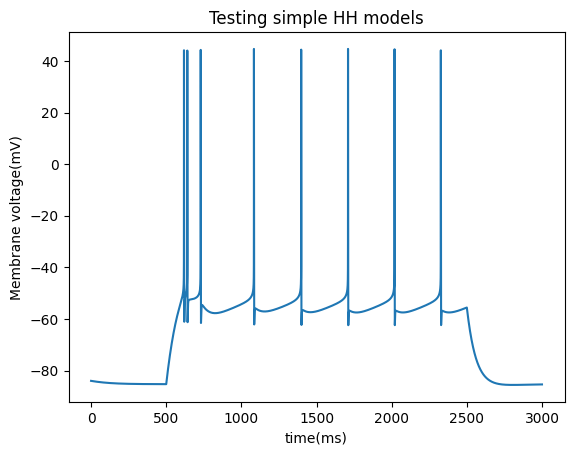

In [9]:
plt.Figure()
plt.plot(t,v)
plt.xlabel("time(ms)")
plt.ylabel("Membrane voltage(mV)")
plt.title("Testing simple HH models")
plt.show()

Vector[0]
[618.0000000000857, 640.1000000000656, 729.2999999999845, 1083.3999999996624, 1397.8999999993764, 1709.399999999093, 2018.8999999988116, 2326.8999999997995]
4.681373983264872


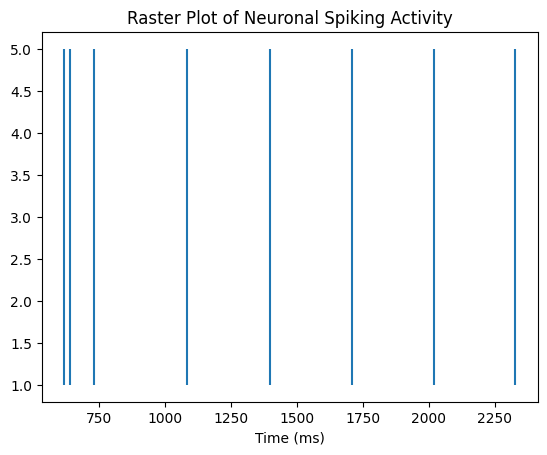

In [10]:
print(cell.spike_times)
spiketimes = cell.spike_times.to_python()
plt.Figure()
plt.vlines(spiketimes,1,5)
plt.xlabel('Time (ms)')
plt.title('Raster Plot of Neuronal Spiking Activity')

print(spiketimes)
time=spiketimes[-1]-spiketimes[0]
freq=len(spiketimes)/time*1000
print(freq)